In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nearest_neighbour(img, ratio):
    """
    1. 找到離映射點最近的座標值
    2. 取其灰階或彩色值作為內插值
    """
    org_h, org_w, channel = img.shape
    new_h, new_w = int(org_h*ratio), int(org_w*ratio)
    # 新影像
    new_img = np.zeros((new_h, new_w, channel), dtype=np.uint8)
    
    for x in range(new_w):
        for y in range(new_h):
            # 從原始影像中找離映射點最近的座標值
            org_x = x * (org_w/new_w)
            org_y = y * (org_h/new_h)
            
            # 可能為負值、小數點
            # 等座標只能整數
            # 負值座標=0, 大於長寬的座標等於長寬
            org_x = np.clip(int(np.round(org_x)), 0, org_w-1)
            org_y = np.clip(int(np.round(org_y)), 0, org_h-1)
            
            new_img[y, x] = img[org_y, org_x]
            
    return new_img

In [3]:
def bilinear(img, size):
    """
    1. 先從原始影像中找到離目標最近的值
    2. 計算四個鄰近點座標
    3. 雙線性插值
        - 先對兩個x方向進行插值
        - 再對y方向進行插值
    """
    org_h, org_w, channel = img.shape
    new_h, new_w = size
    # 新影像
    new_img = np.zeros((new_h, new_w, channel), dtype=np.uint8)
    
    # 縮放比例
    scale_w = float(org_w) / new_w
    scale_h = float(org_h) / new_h
    
    for c in range(channel):
        for x in range(new_w):
            for y in range(new_h):
                # 從原始影像中找離映射點最近的座標值
                org_x = (x+0.5)*scale_w-0.5
                org_y = (y+0.5)*scale_h-0.5
                
                # 計算原圖上四個鄰近點的位置
                org_x0 = int(np.floor(org_x))
                org_y0 = int(np.floor(org_y))
                org_x1 = min(org_x0+1, org_w-1)
                org_y1 = min(org_y0+1, org_h-1)
                #print(org_x0, org_y0, org_x1, org_y1)
                
                # 雙線性插值
                # 先對兩個x方向進行線性插值
                # 再對y方向進行線性插值
                value0 = (org_x1 - org_x) * img[org_y0, org_x0, c] + (org_x - org_x0) * img[org_y0, org_x1, c]
                value1 = (org_x1 - org_x) * img[org_y1, org_x0, c] + (org_x - org_x0) * img[org_y1, org_x1, c]
                new_img[y, x, c] = int((org_y1 - org_y) * value0 + (org_y - org_y0) * value1)
    return new_img

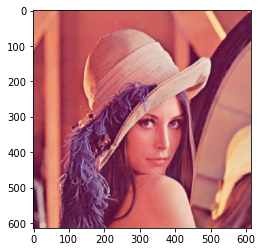

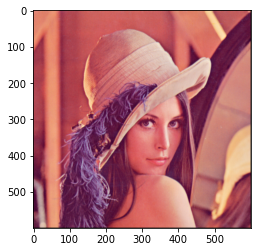

In [4]:
img = cv2.imread('./Lenna.png')
# 縮放倍數
ratio = 1.2
new_img = nearest_neighbour(img, ratio)
plt.imshow(new_img[:,:,::-1])
plt.show()

new_img1 = bilinear(img, (600,600))
plt.imshow(new_img1[:,:,::-1])
plt.show()

# 比較Nearest neighbor和Bilinear interpolation

(<matplotlib.axes._subplots.AxesSubplot at 0x7fad140c31f0>,
 Text(0.5, 1.0, 'Bilinear interpolation'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7fad13e61df0>)

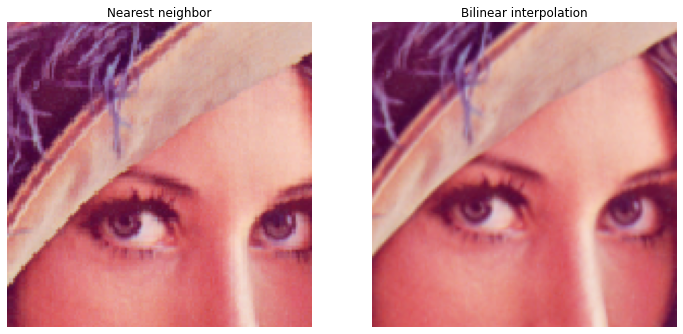

In [14]:
img = [new_img[:,:,::-1], new_img1[:,:,::-1]]

# 局部位置
x = 260
y = 220
s = 150

plt.figure(figsize=(12,6))
#plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(1,2,1),plt.title('Nearest neighbor'), plt.axis('off'), plt.imshow(img[0][y:y+s, x:x+s])
plt.subplot(1,2,2),plt.title('Bilinear interpolation'), plt.axis('off'), plt.imshow(img[1][y:y+s, x:x+s])